In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import functools
import numpy as np
import pvtrace
import scintillator_tracer as st

# Left cut

In [19]:
LEFT_CUT_STL = '/home/reed/Documents/research/grimpress/crystal-geometry/notebooks/isosceles_prisms/cut_progression/models/left-cut-Body.stl'
LEFT_CUT_ESR_SHELL_STL = '/home/reed/Documents/research/grimpress/crystal-geometry/notebooks/isosceles_prisms/cut_progression/models/left-cut-esr-shell-Body.stl'

In [20]:
def build_left_cut_world(
    crystal_kwargs: dict = {},
    esr_shell_kwargs: dict = {},
    optical_pad_kwargs: dict = {},
    sipm_kwargs: dict = {},
    world: pvtrace.Node = None
) -> dict:
    """
    The kwargs for each node are the arguments to their respective generation
    functions in the "definitions" submodule. If not specified, the defaults
    will be used.
    """
    
    if world is None:
        world = st.definitions.generate_world()
    
    DEFAULT_KWARGS = dict(
        crystal = dict(
            stl_file=LEFT_CUT_STL,
            scaling=0.1,
            world=world
        ),
        esr_shell = dict(
            stl_file=LEFT_CUT_ESR_SHELL_STL,
            scaling=0.1,
            world=world
        ),
        optical_pad = dict(
            world=world,
            size=(0.4, 6.6, 0.01)
        ),
        sipm = dict(
            world=world,
            size=(0.6, 6.6, 0.05)
        )
    )
    
    crystal = st.definitions.generate_crystal(**{**DEFAULT_KWARGS['crystal'], **crystal_kwargs})
    esr_shell = st.definitions.generate_esr_shell(**{**DEFAULT_KWARGS['esr_shell'], **esr_shell_kwargs})
    optical_pad = st.definitions.generate_optical_pad(**{**DEFAULT_KWARGS['optical_pad'], **optical_pad_kwargs})
    sipm = st.definitions.generate_sipm(**{**DEFAULT_KWARGS['sipm'], **sipm_kwargs})

    st.worlds.basic_stack(crystal, esr_shell, optical_pad, sipm, 0.0101)

    nodes = dict(
        world=world,
        crystal=crystal,
        esr_shell=esr_shell,
        optical_pad=optical_pad,
        sipm=sipm
    )

    return nodes

## Verification

In [21]:
world_func = functools.partial(build_left_cut_world)
nodes = world_func()
world = nodes['world']

height = st.geometry_helpers.get_node_height(nodes['crystal'])
light = st.definitions.generate_scintillated_light_node(world)
light.location = (0, 0, height/2)

scene = pvtrace.Scene(world)
all_ray_steps = st.processing.process_photons_with_visual(scene, 100, seed=100, open_browser=True)

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7008/static/


## Grid trials

In [22]:
nodes = world_func()
crystal = nodes['crystal']

zrange = (
    st.geometry_helpers.min_physical_value(crystal, 'z')+0.4,
    st.geometry_helpers.max_physical_value(crystal, 'z')-0.3,
)
yrange = (
    st.geometry_helpers.min_physical_value(crystal, 'y')+0.5,
    st.geometry_helpers.max_physical_value(crystal, 'y')-0.5,
)

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7009/static/


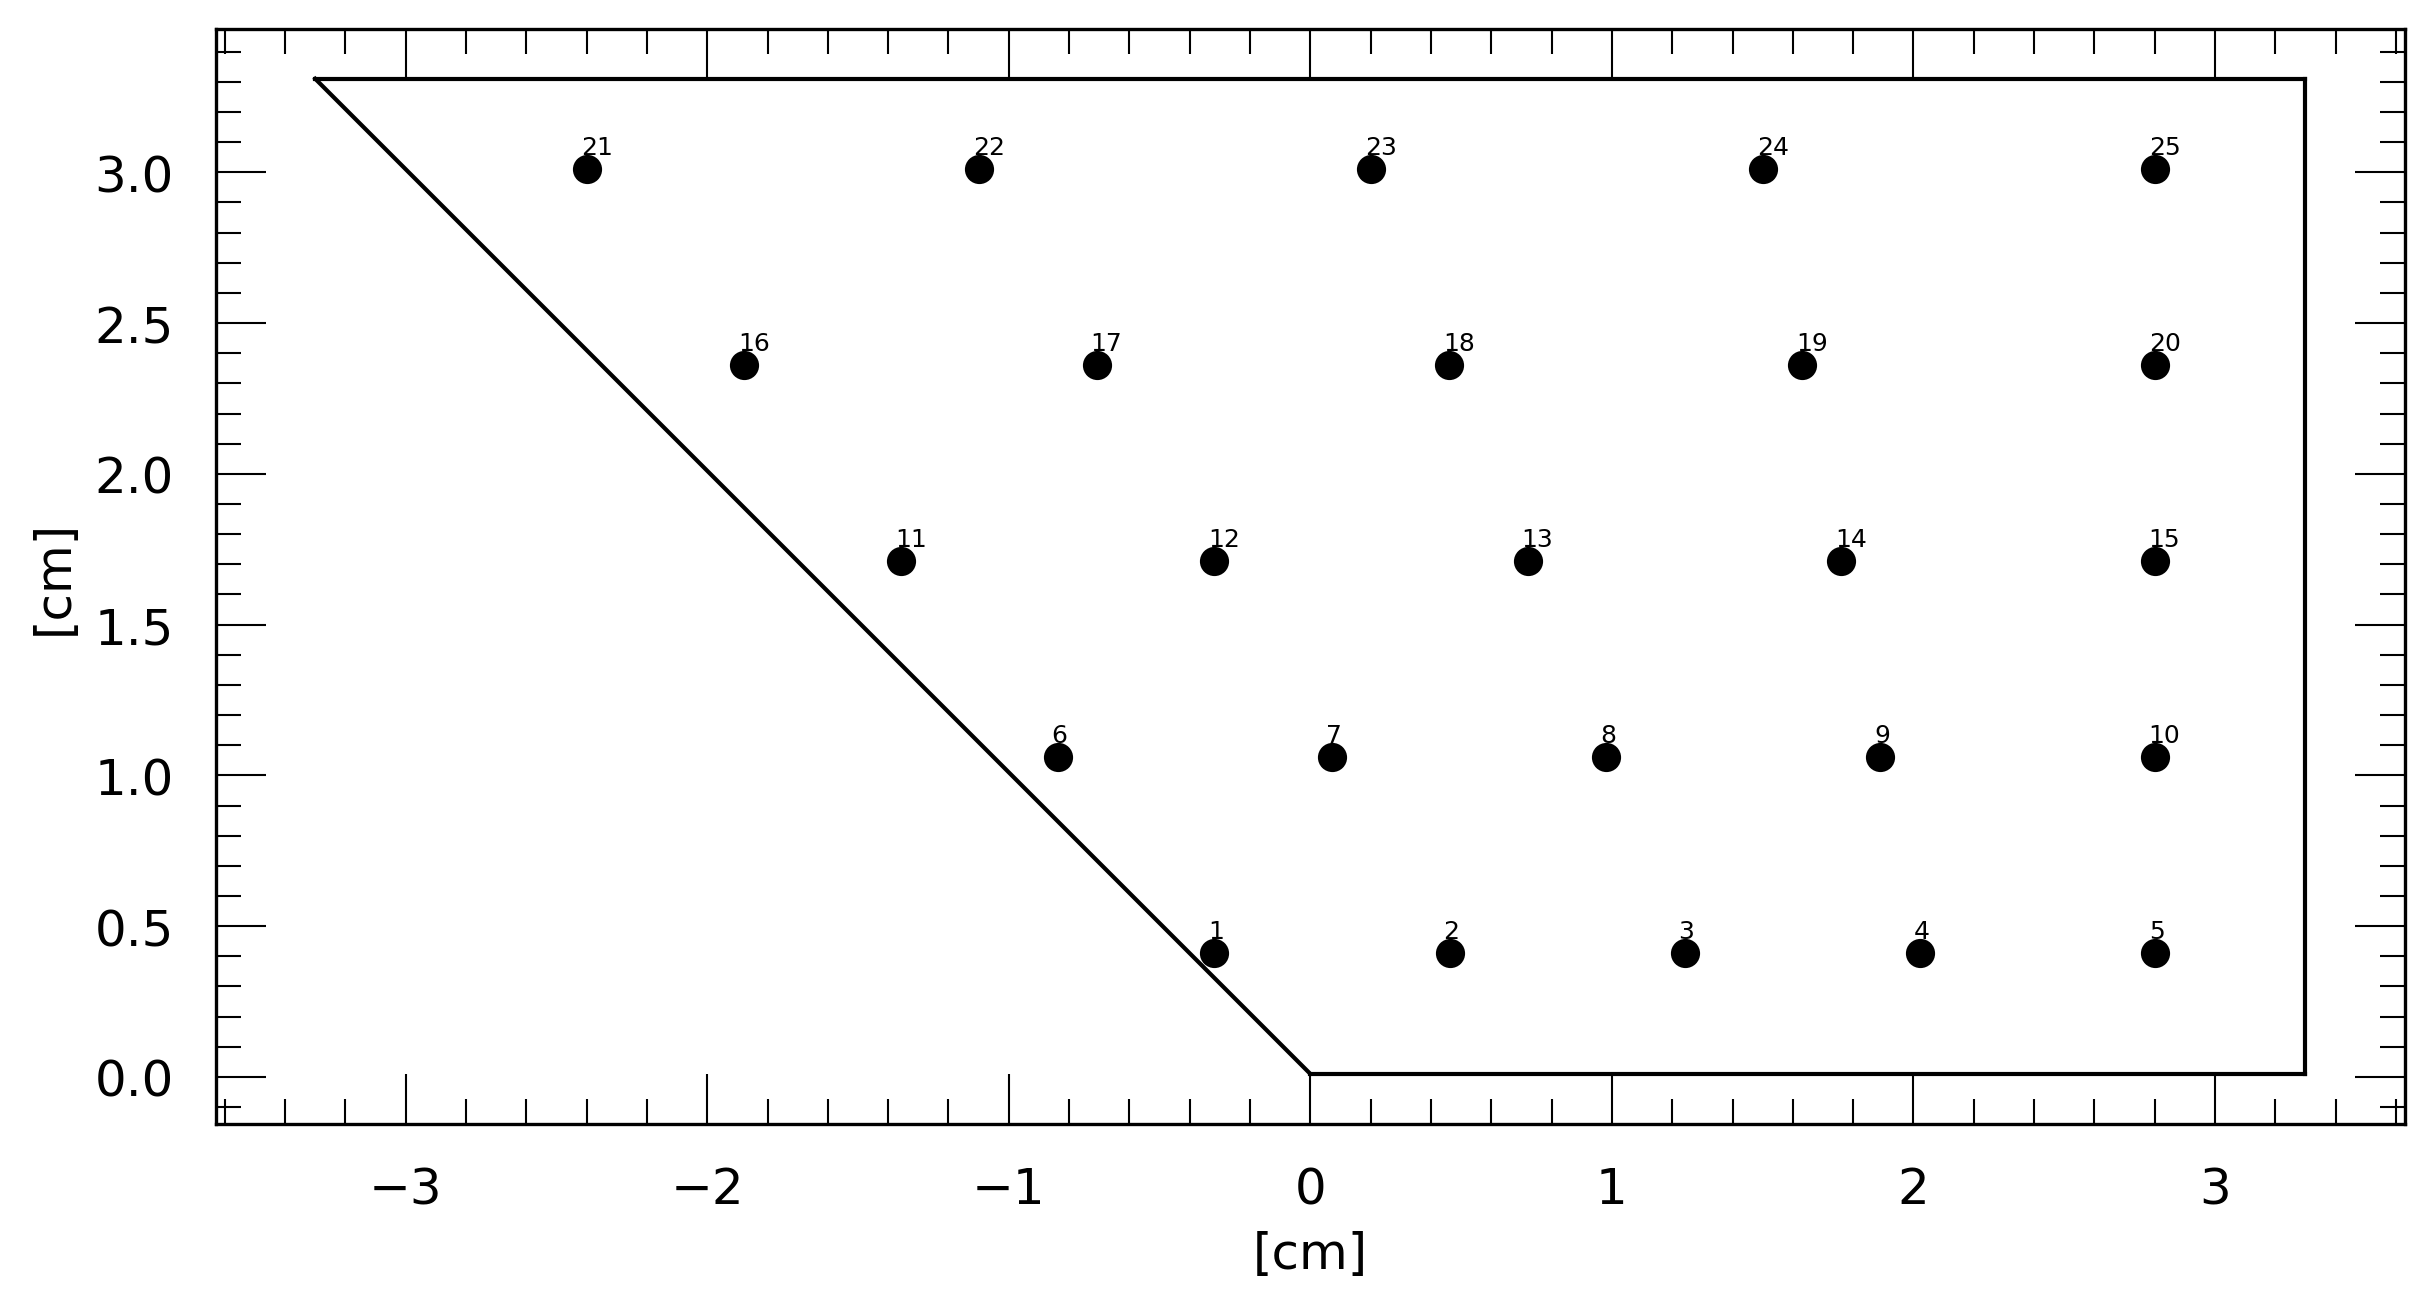

In [23]:
steps = 5
man = st.processing.Manager(world_func, out_dir=f'left_cut/')
man.define_grid(
    vertical_range=zrange,
    horizontal_func=lambda z: (-0.8*z+0.01, yrange[1]),
    steps=steps,
    visualize=True
)

## Run

In [24]:
runs = man.run(200, seed=100, visualize=False)

/home/reed/Documents/research/grimpress/crystal-geometry/scintillator_tracer/plotting.py:91: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  C = ax.pcolormesh(Y, Z, surface, **pcolorkwargs)


left_cut/runs_20240808T134341/figures/crystal_absorbed.png
left_cut/runs_20240808T134341/figures/optical pad_absorbed.png
left_cut/runs_20240808T134341/figures/sipm_absorbed.png


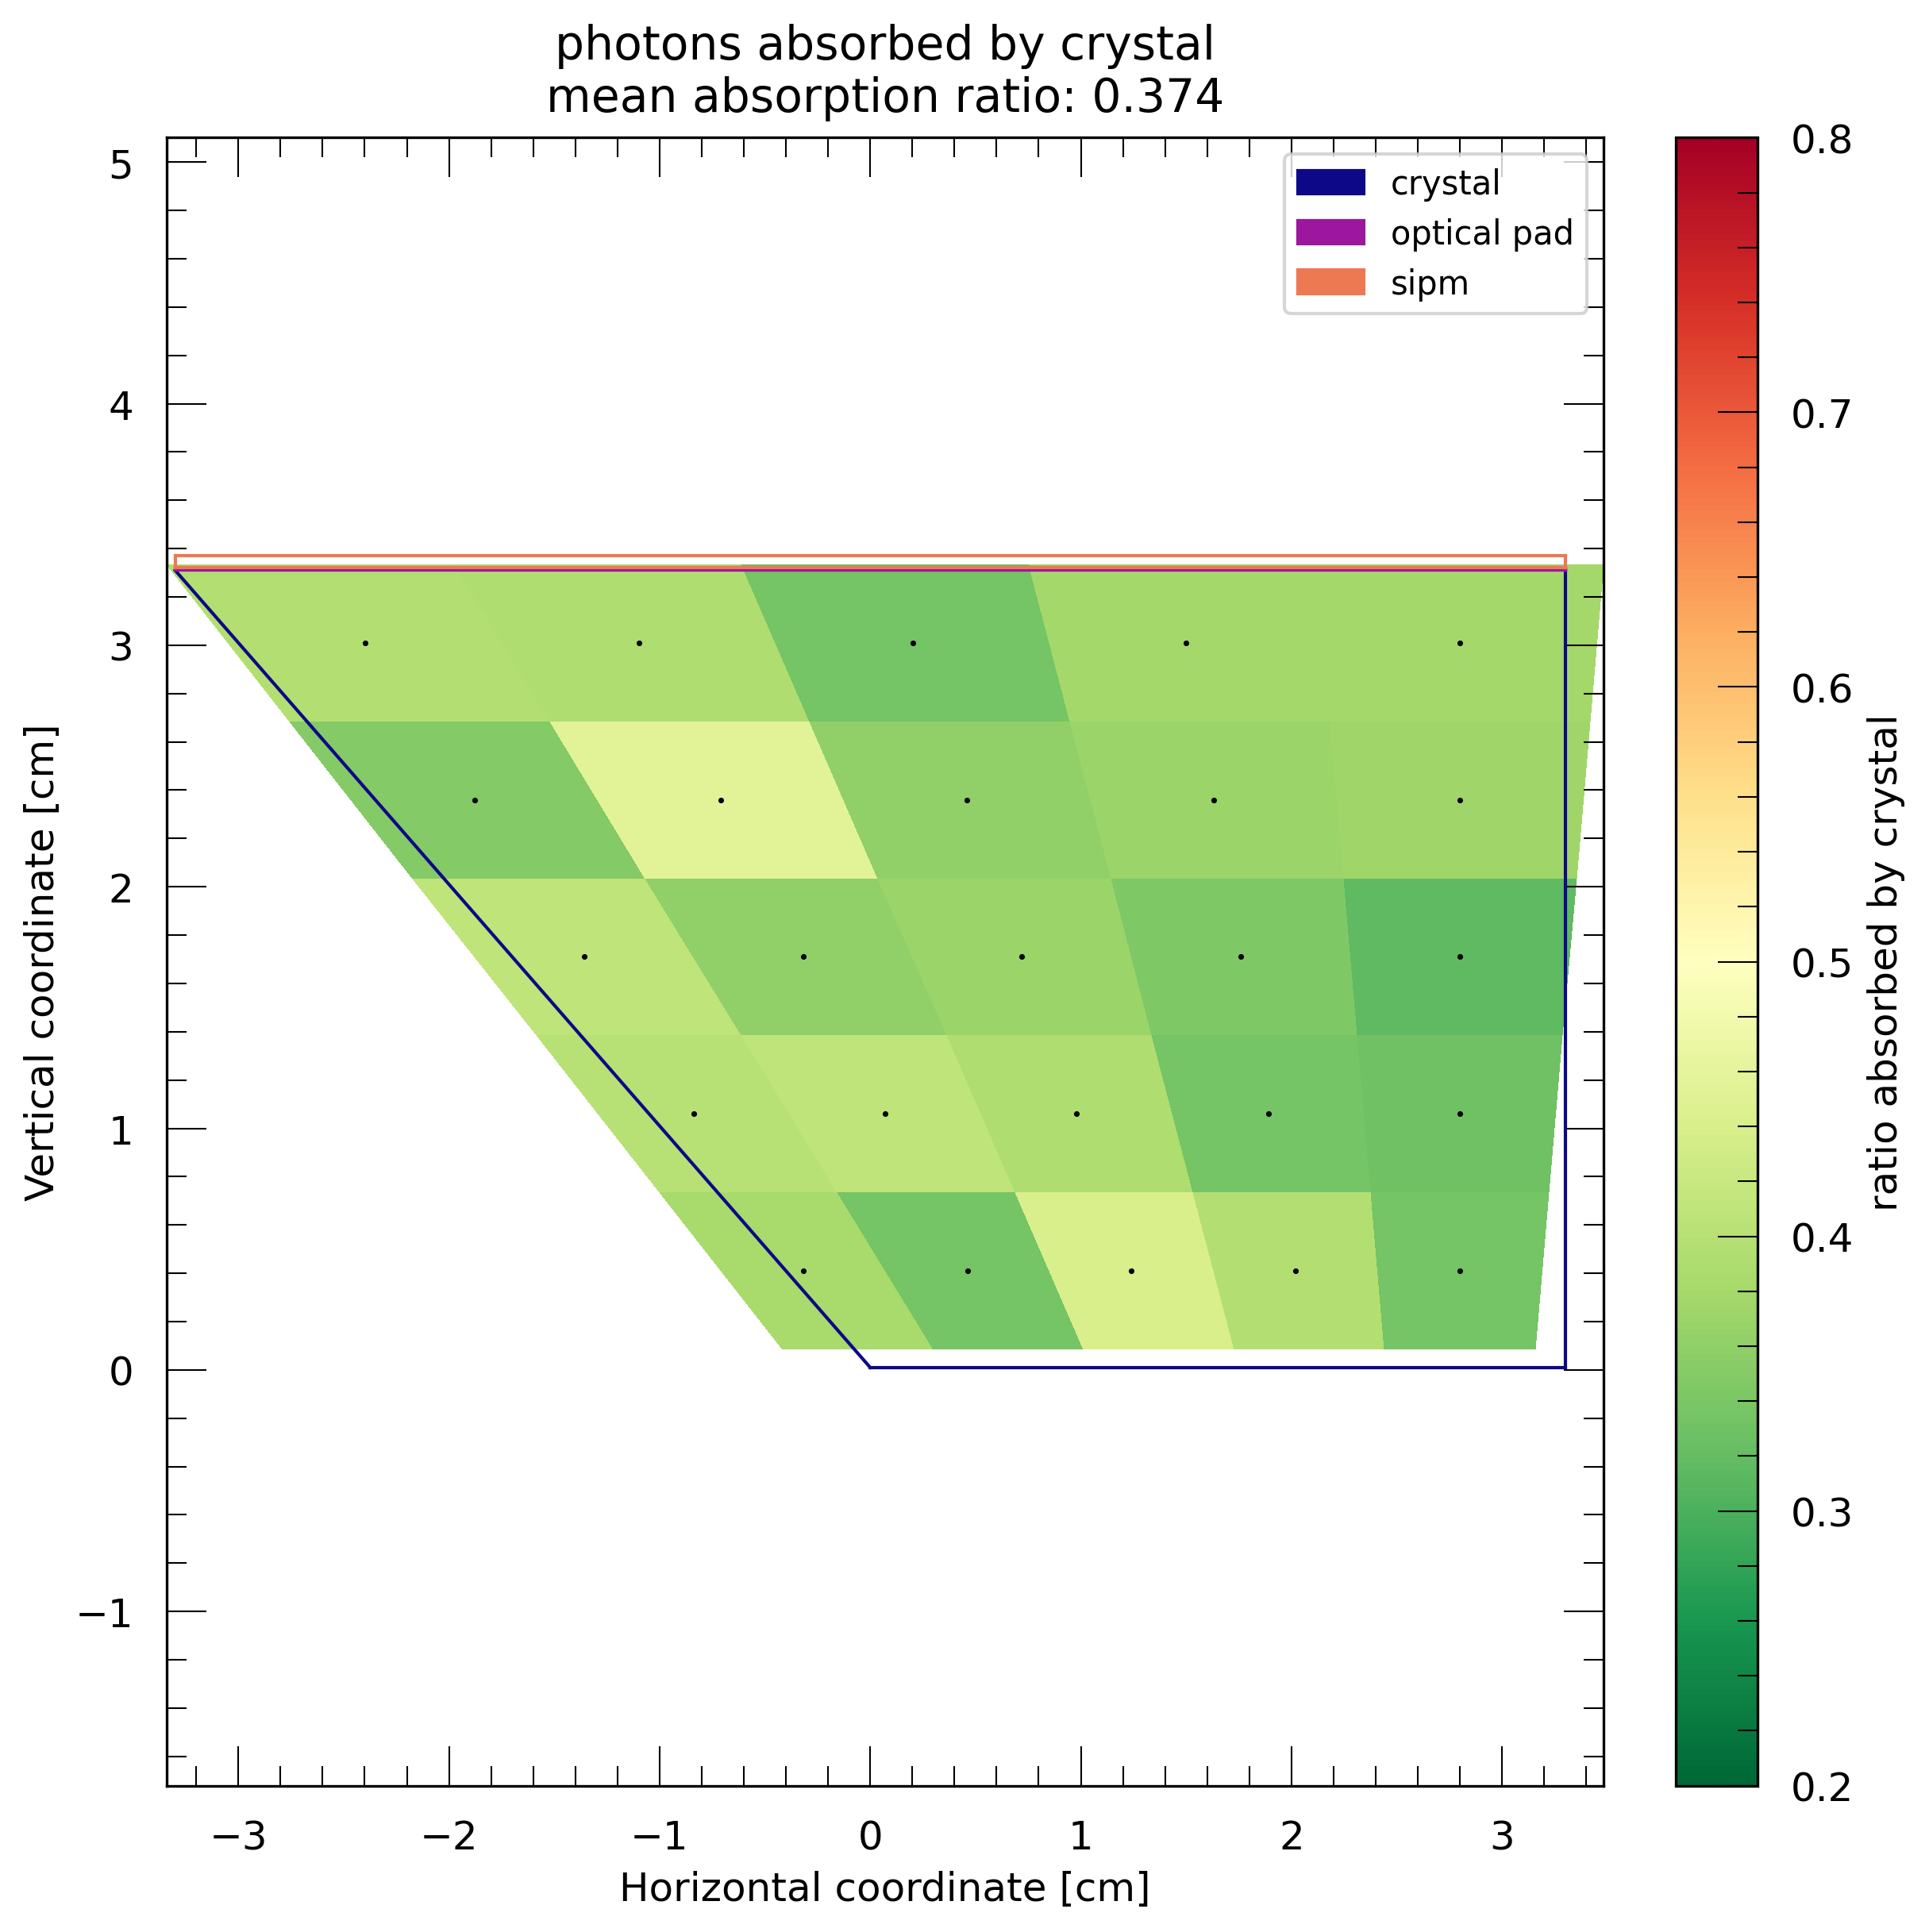

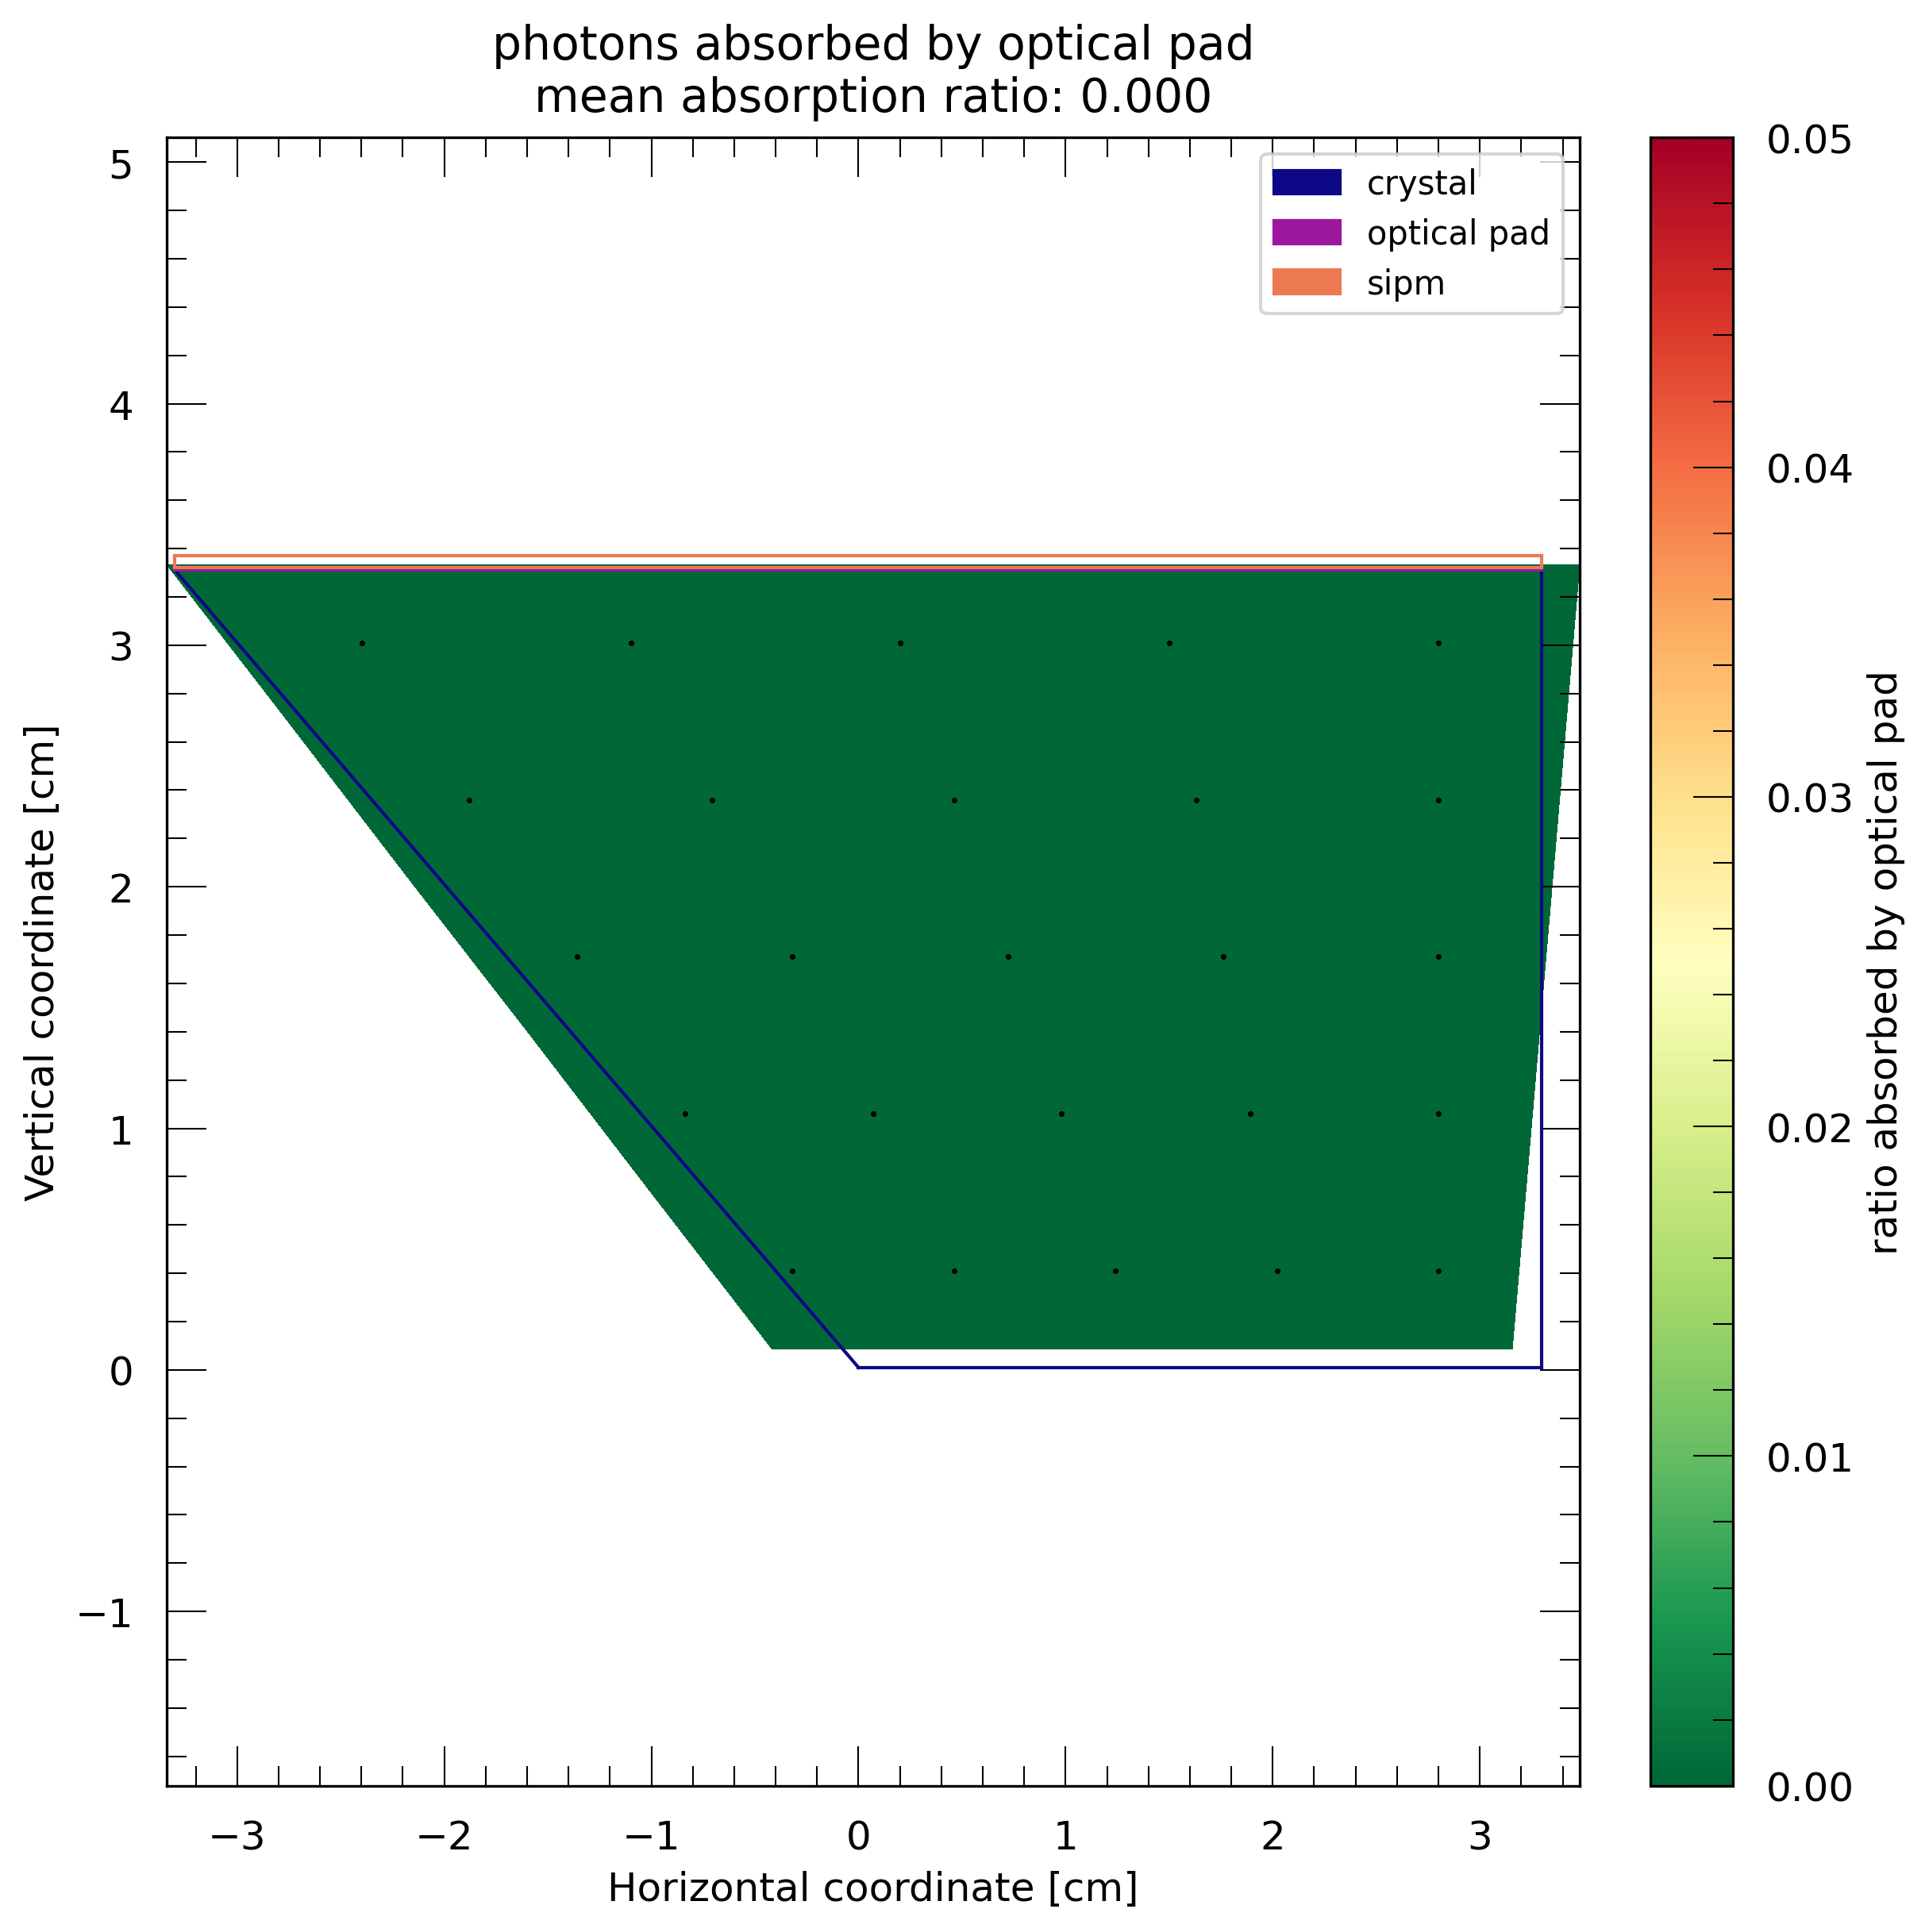

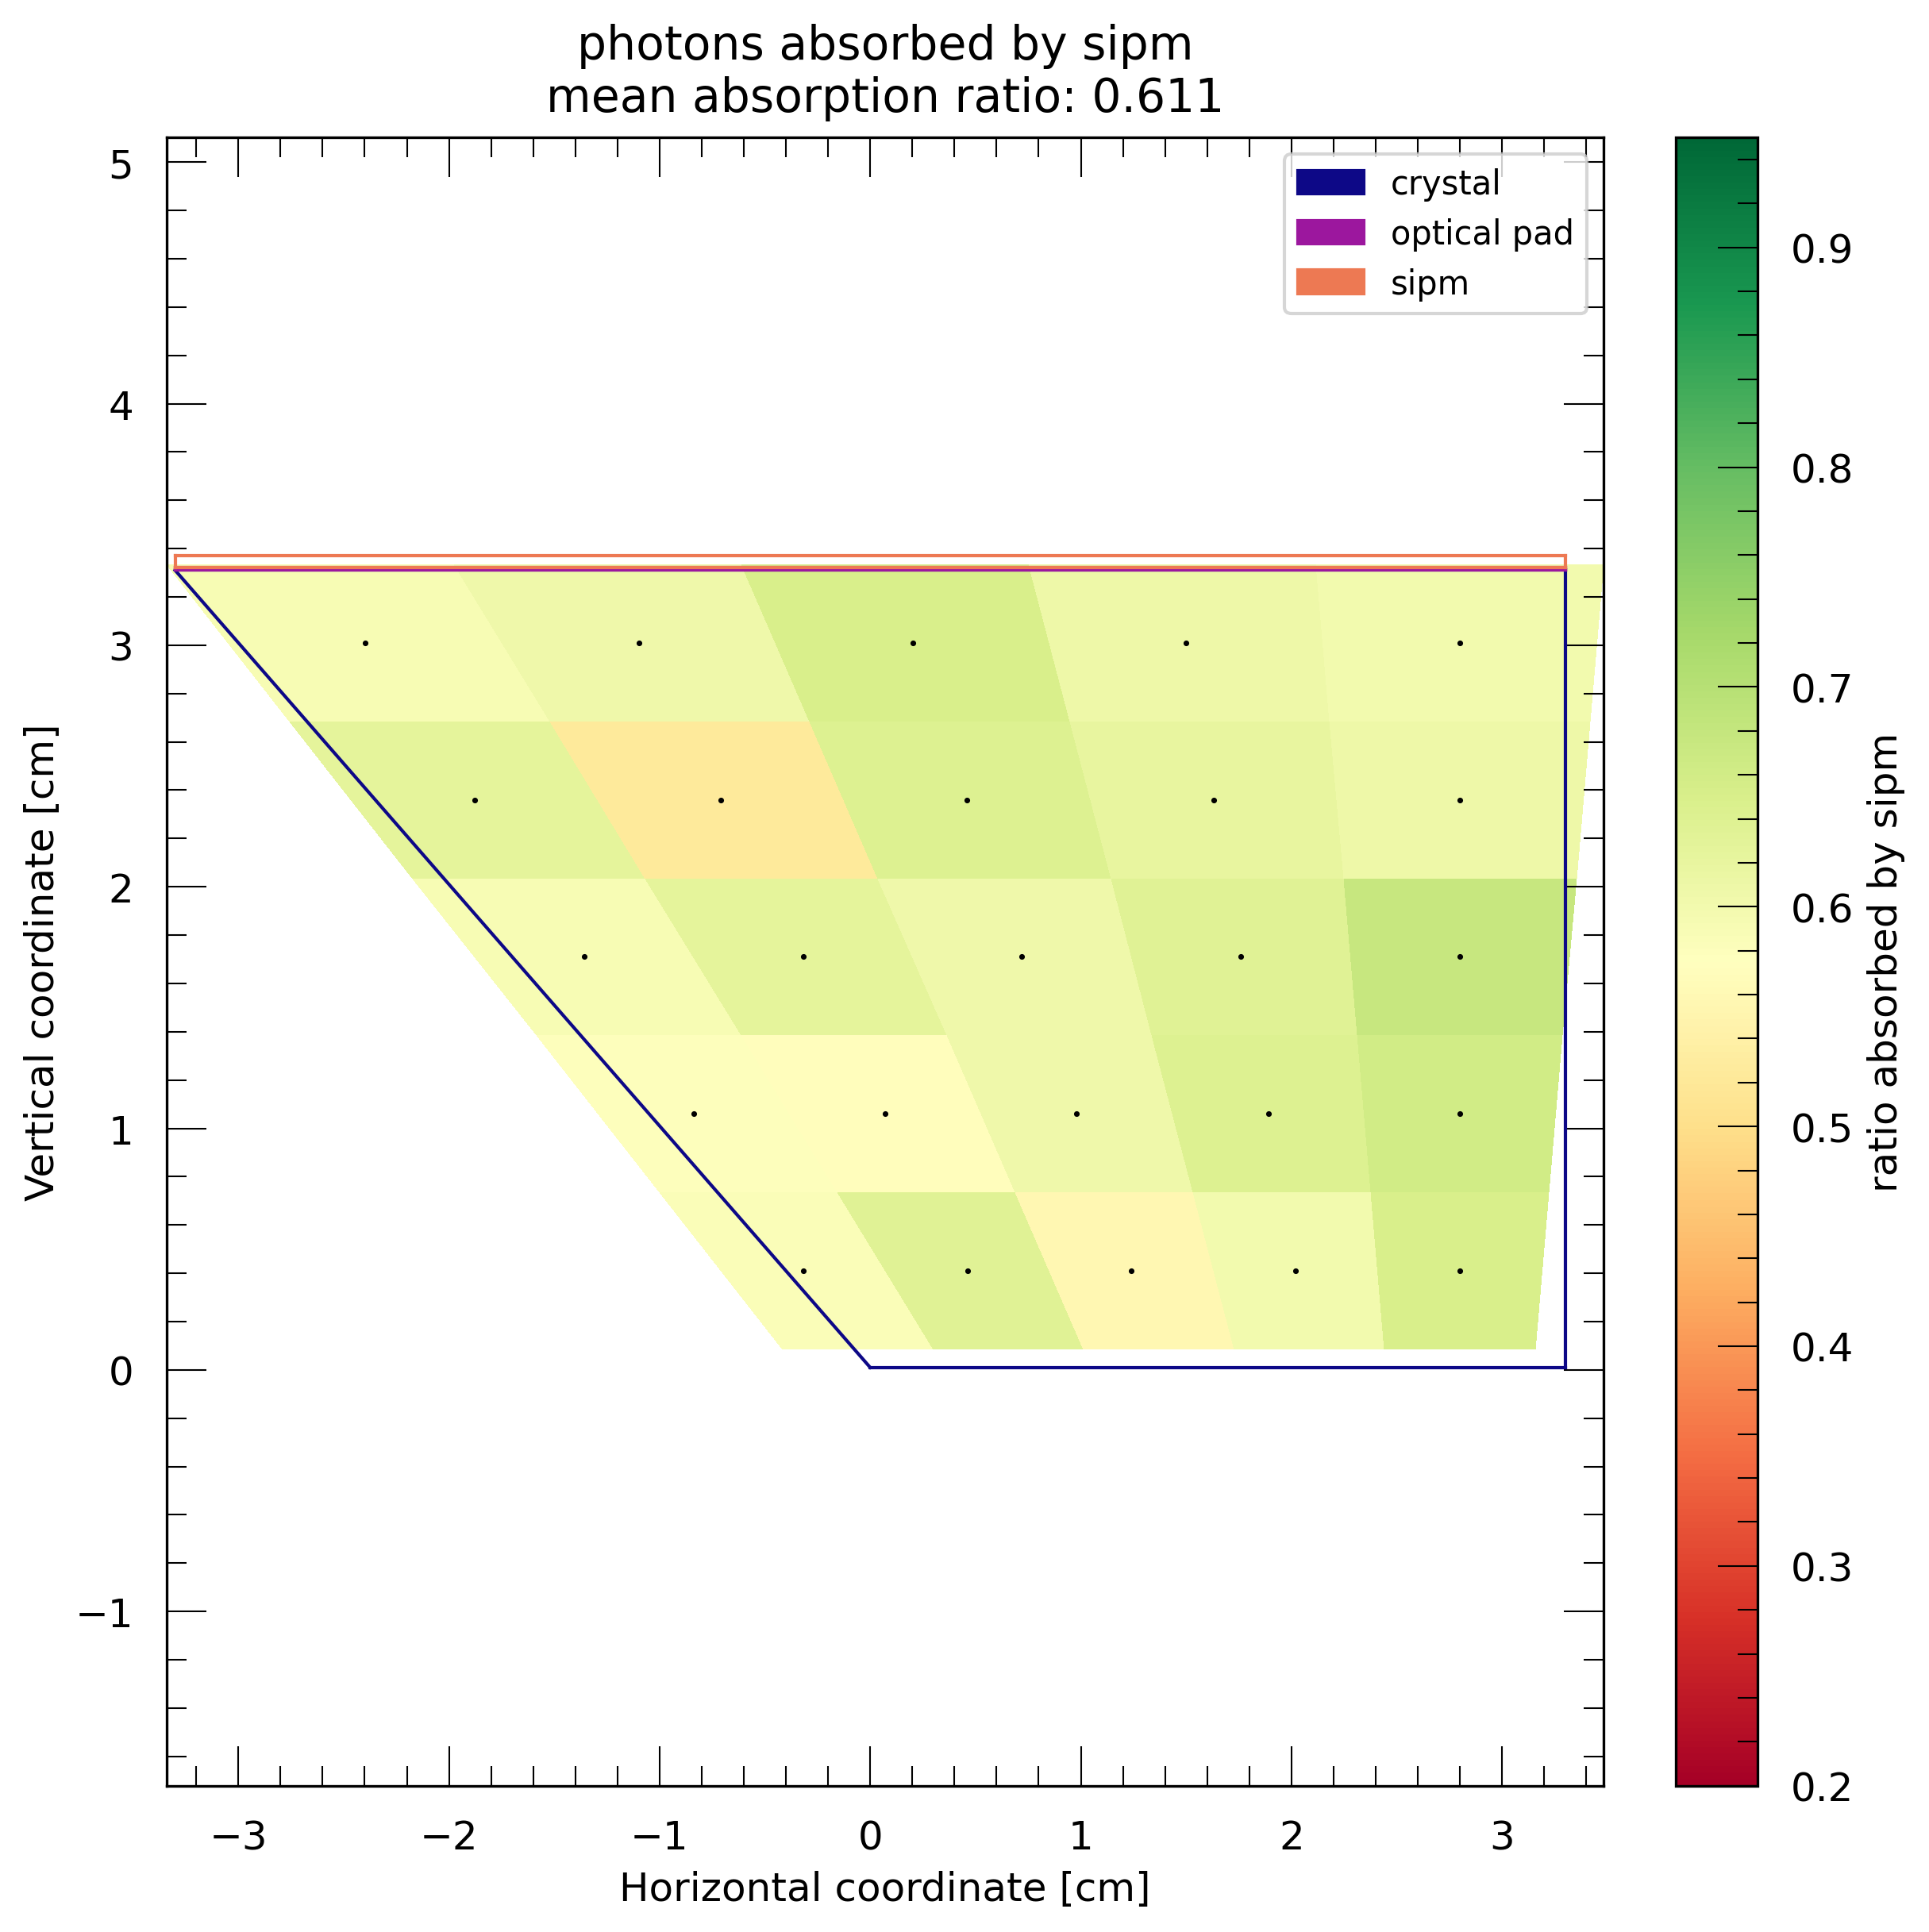

In [25]:
man.plot_all_ratios_absorbed(sipm_kwargs=dict(vmax=0.95))

# Left and right cut

In [11]:
LEFT_AND_RIGHT_CUT_STL = '/home/reed/Documents/research/grimpress/crystal-geometry/notebooks/isosceles_prisms/cut_progression/models/left-right-cut-Body.stl'
LEFT_AND_RIGHT_CUT_ESR_SHELL_STL = '/home/reed/Documents/research/grimpress/crystal-geometry/notebooks/isosceles_prisms/cut_progression/models/left-right-cut-esr-shell-Body.stl'

In [18]:
def build_left_and_right_cut_world(
    crystal_kwargs: dict = {},
    esr_shell_kwargs: dict = {},
    optical_pad_kwargs: dict = {},
    sipm_kwargs: dict = {},
    world: pvtrace.Node = None
) -> dict:
    """
    The kwargs for each node are the arguments to their respective generation
    functions in the "definitions" submodule. If not specified, the defaults
    will be used.
    """
    
    if world is None:
        world = st.definitions.generate_world()
    
    DEFAULT_KWARGS = dict(
        crystal = dict(
            stl_file=LEFT_AND_RIGHT_CUT_STL,
            scaling=0.1,
            world=world
        ),
        esr_shell = dict(
            stl_file=LEFT_AND_RIGHT_CUT_ESR_SHELL_STL,
            scaling=0.1,
            world=world
        ),
        optical_pad = dict(
            world=world,
            size=(0.4, 6.6, 0.01)
        ),
        sipm = dict(
            world=world,
            size=(0.6, 6.6, 0.05)
        )
    )
    
    crystal = st.definitions.generate_crystal(**{**DEFAULT_KWARGS['crystal'], **crystal_kwargs})
    esr_shell = st.definitions.generate_esr_shell(**{**DEFAULT_KWARGS['esr_shell'], **esr_shell_kwargs})
    optical_pad = st.definitions.generate_optical_pad(**{**DEFAULT_KWARGS['optical_pad'], **optical_pad_kwargs})
    sipm = st.definitions.generate_sipm(**{**DEFAULT_KWARGS['sipm'], **sipm_kwargs})
    
    h = (0.01+0.0001) / np.sin(np.radians(90/2))
    st.worlds.basic_stack(crystal, esr_shell, optical_pad, sipm, h)

    nodes = dict(
        world=world,
        crystal=crystal,
        esr_shell=esr_shell,
        optical_pad=optical_pad,
        sipm=sipm
    )

    return nodes

## Verification

In [19]:
world_func = functools.partial(build_left_and_right_cut_world)
nodes = world_func()
world = nodes['world']

height = st.geometry_helpers.get_node_height(nodes['crystal'])
light = st.definitions.generate_scintillated_light_node(world)
light.location = (0, 0, height/2)

scene = pvtrace.Scene(world)
all_ray_steps = st.processing.process_photons_with_visual(scene, 100, seed=100, open_browser=True)

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7006/static/


## Grid trials

In [20]:
nodes = world_func()
crystal = nodes['crystal']

zrange = (
    st.geometry_helpers.min_physical_value(crystal, 'z')+0.4,
    st.geometry_helpers.max_physical_value(crystal, 'z')-0.3,
)
yrange = (
    st.geometry_helpers.min_physical_value(crystal, 'y')+0.5,
    st.geometry_helpers.max_physical_value(crystal, 'y')-0.5,
)

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7007/static/


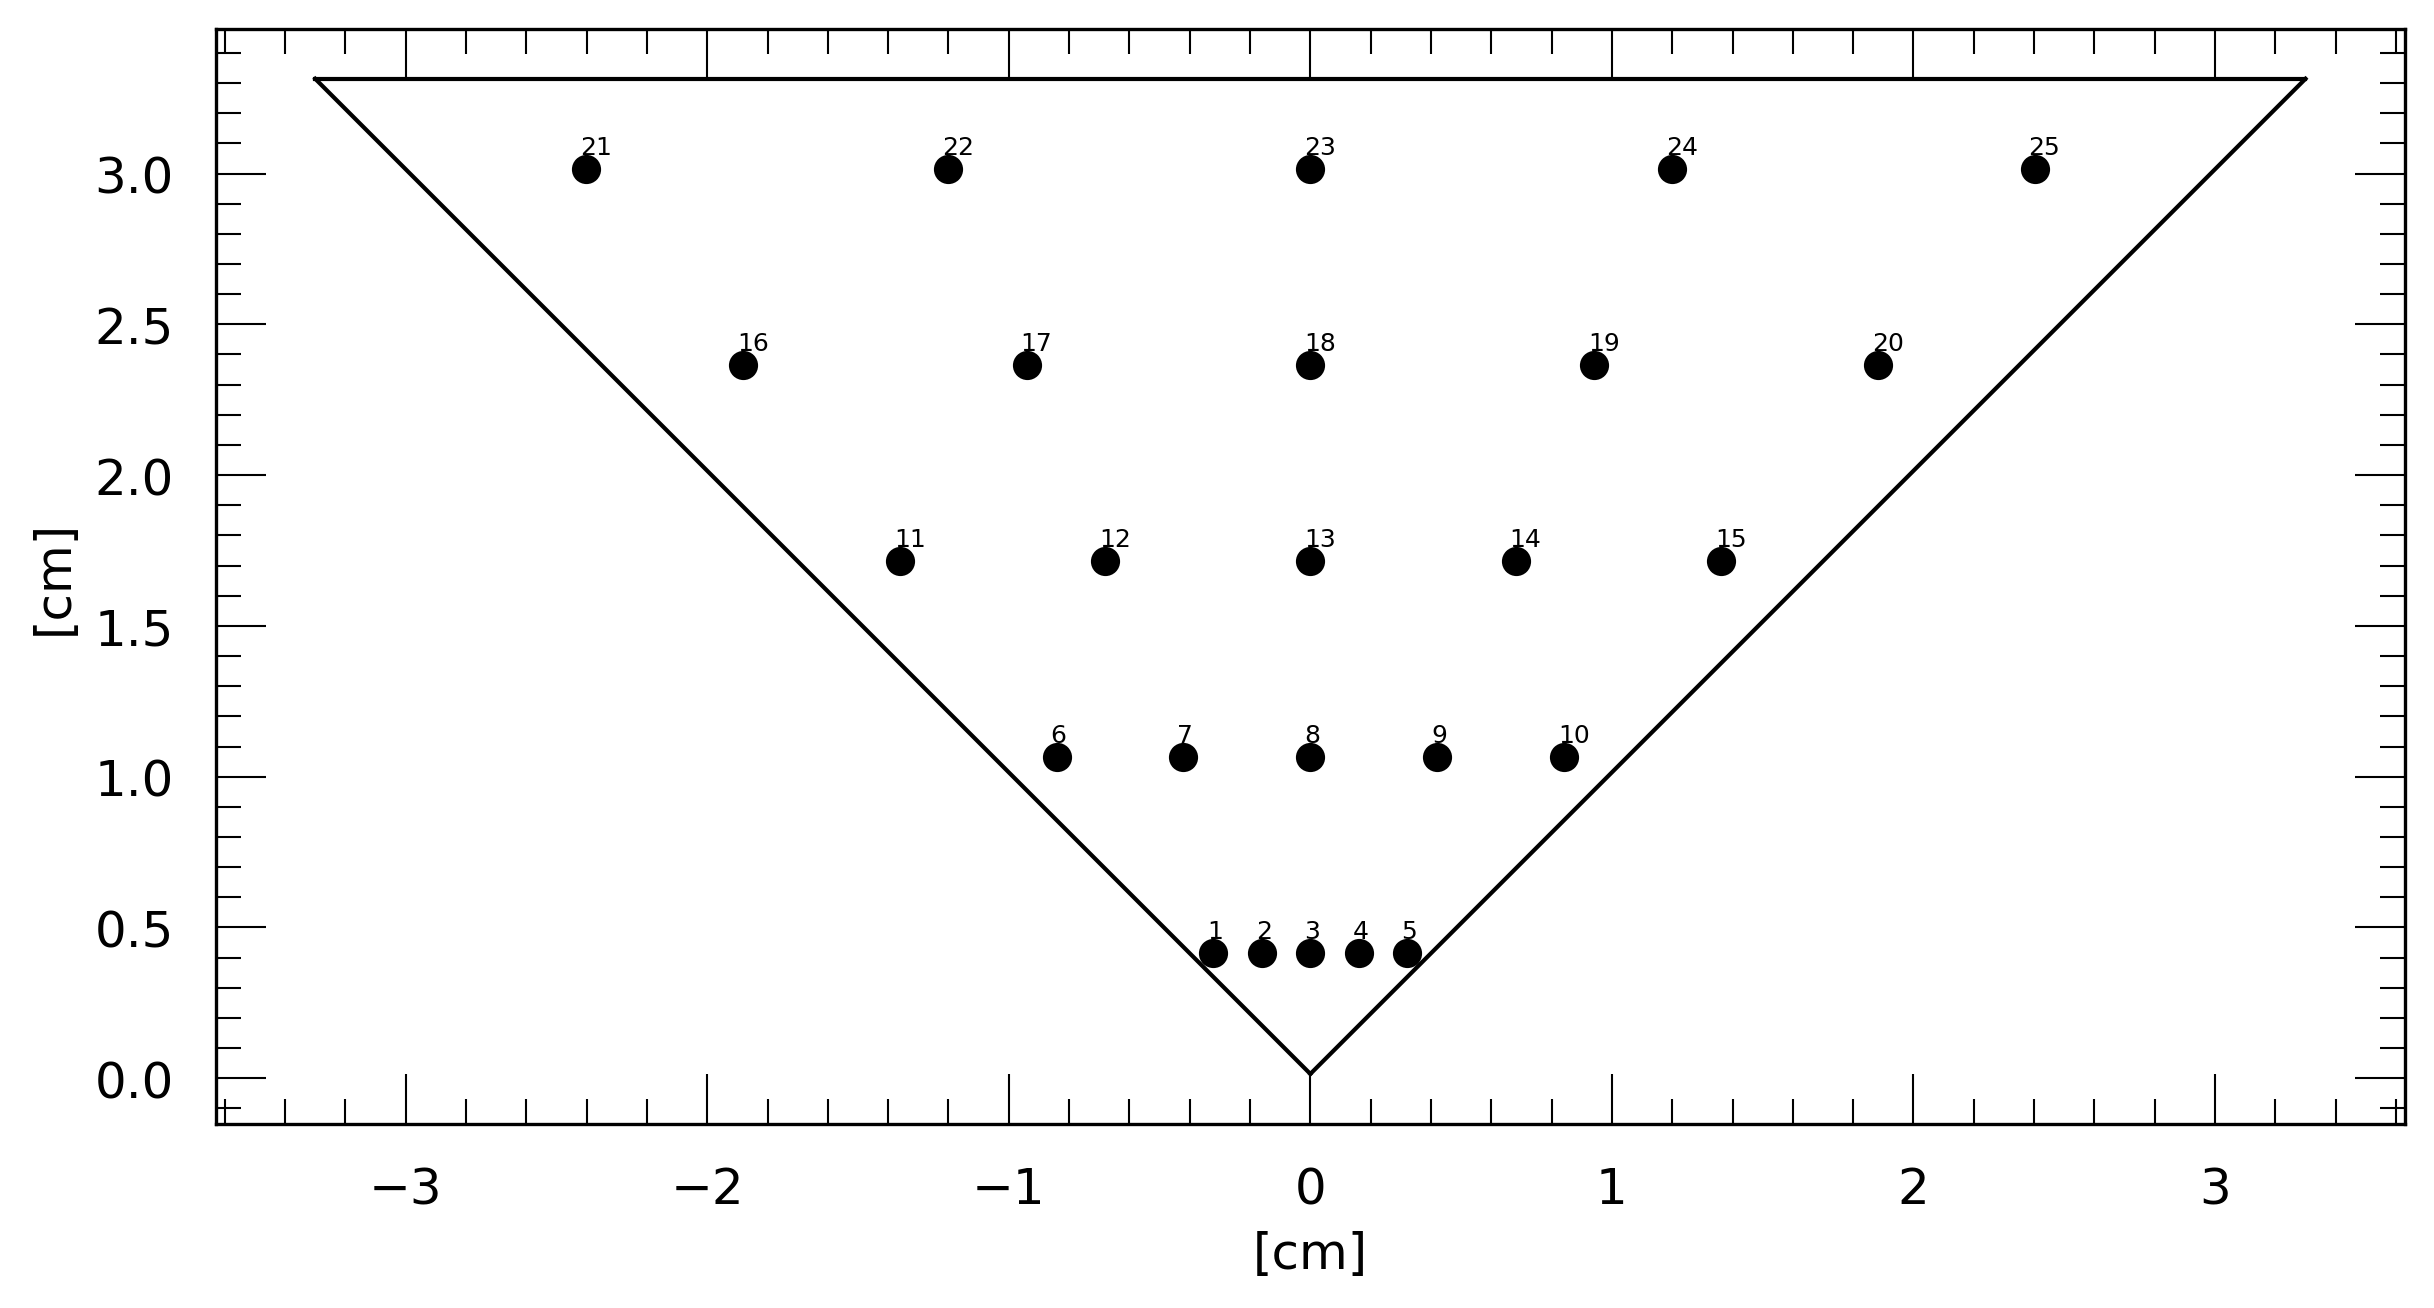

In [21]:
steps = 5
man = st.processing.Manager(world_func, out_dir=f'left_and_right_cut/')
man.define_grid(
    vertical_range=zrange,
    horizontal_func=lambda z: (-0.8*z+0.01, -(-0.8*z+0.01)),
    steps=steps,
    visualize=True
)

## Run

In [22]:
runs = man.run(200, seed=100, visualize=False)

/home/reed/Documents/research/grimpress/crystal-geometry/scintillator_tracer/definitions.py:25: RuntimeWarning: invalid value encountered in double_scalars
  rotation_matrix = np.eye(3) + kmat + kmat.dot(kmat) * ((1 - c) / (s ** 2))


/home/reed/Documents/research/grimpress/crystal-geometry/scintillator_tracer/plotting.py:91: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  C = ax.pcolormesh(Y, Z, surface, **pcolorkwargs)


left_and_right_cut/runs_20240808T141624/figures/crystal_absorbed.png
left_and_right_cut/runs_20240808T141624/figures/optical pad_absorbed.png
left_and_right_cut/runs_20240808T141624/figures/sipm_absorbed.png


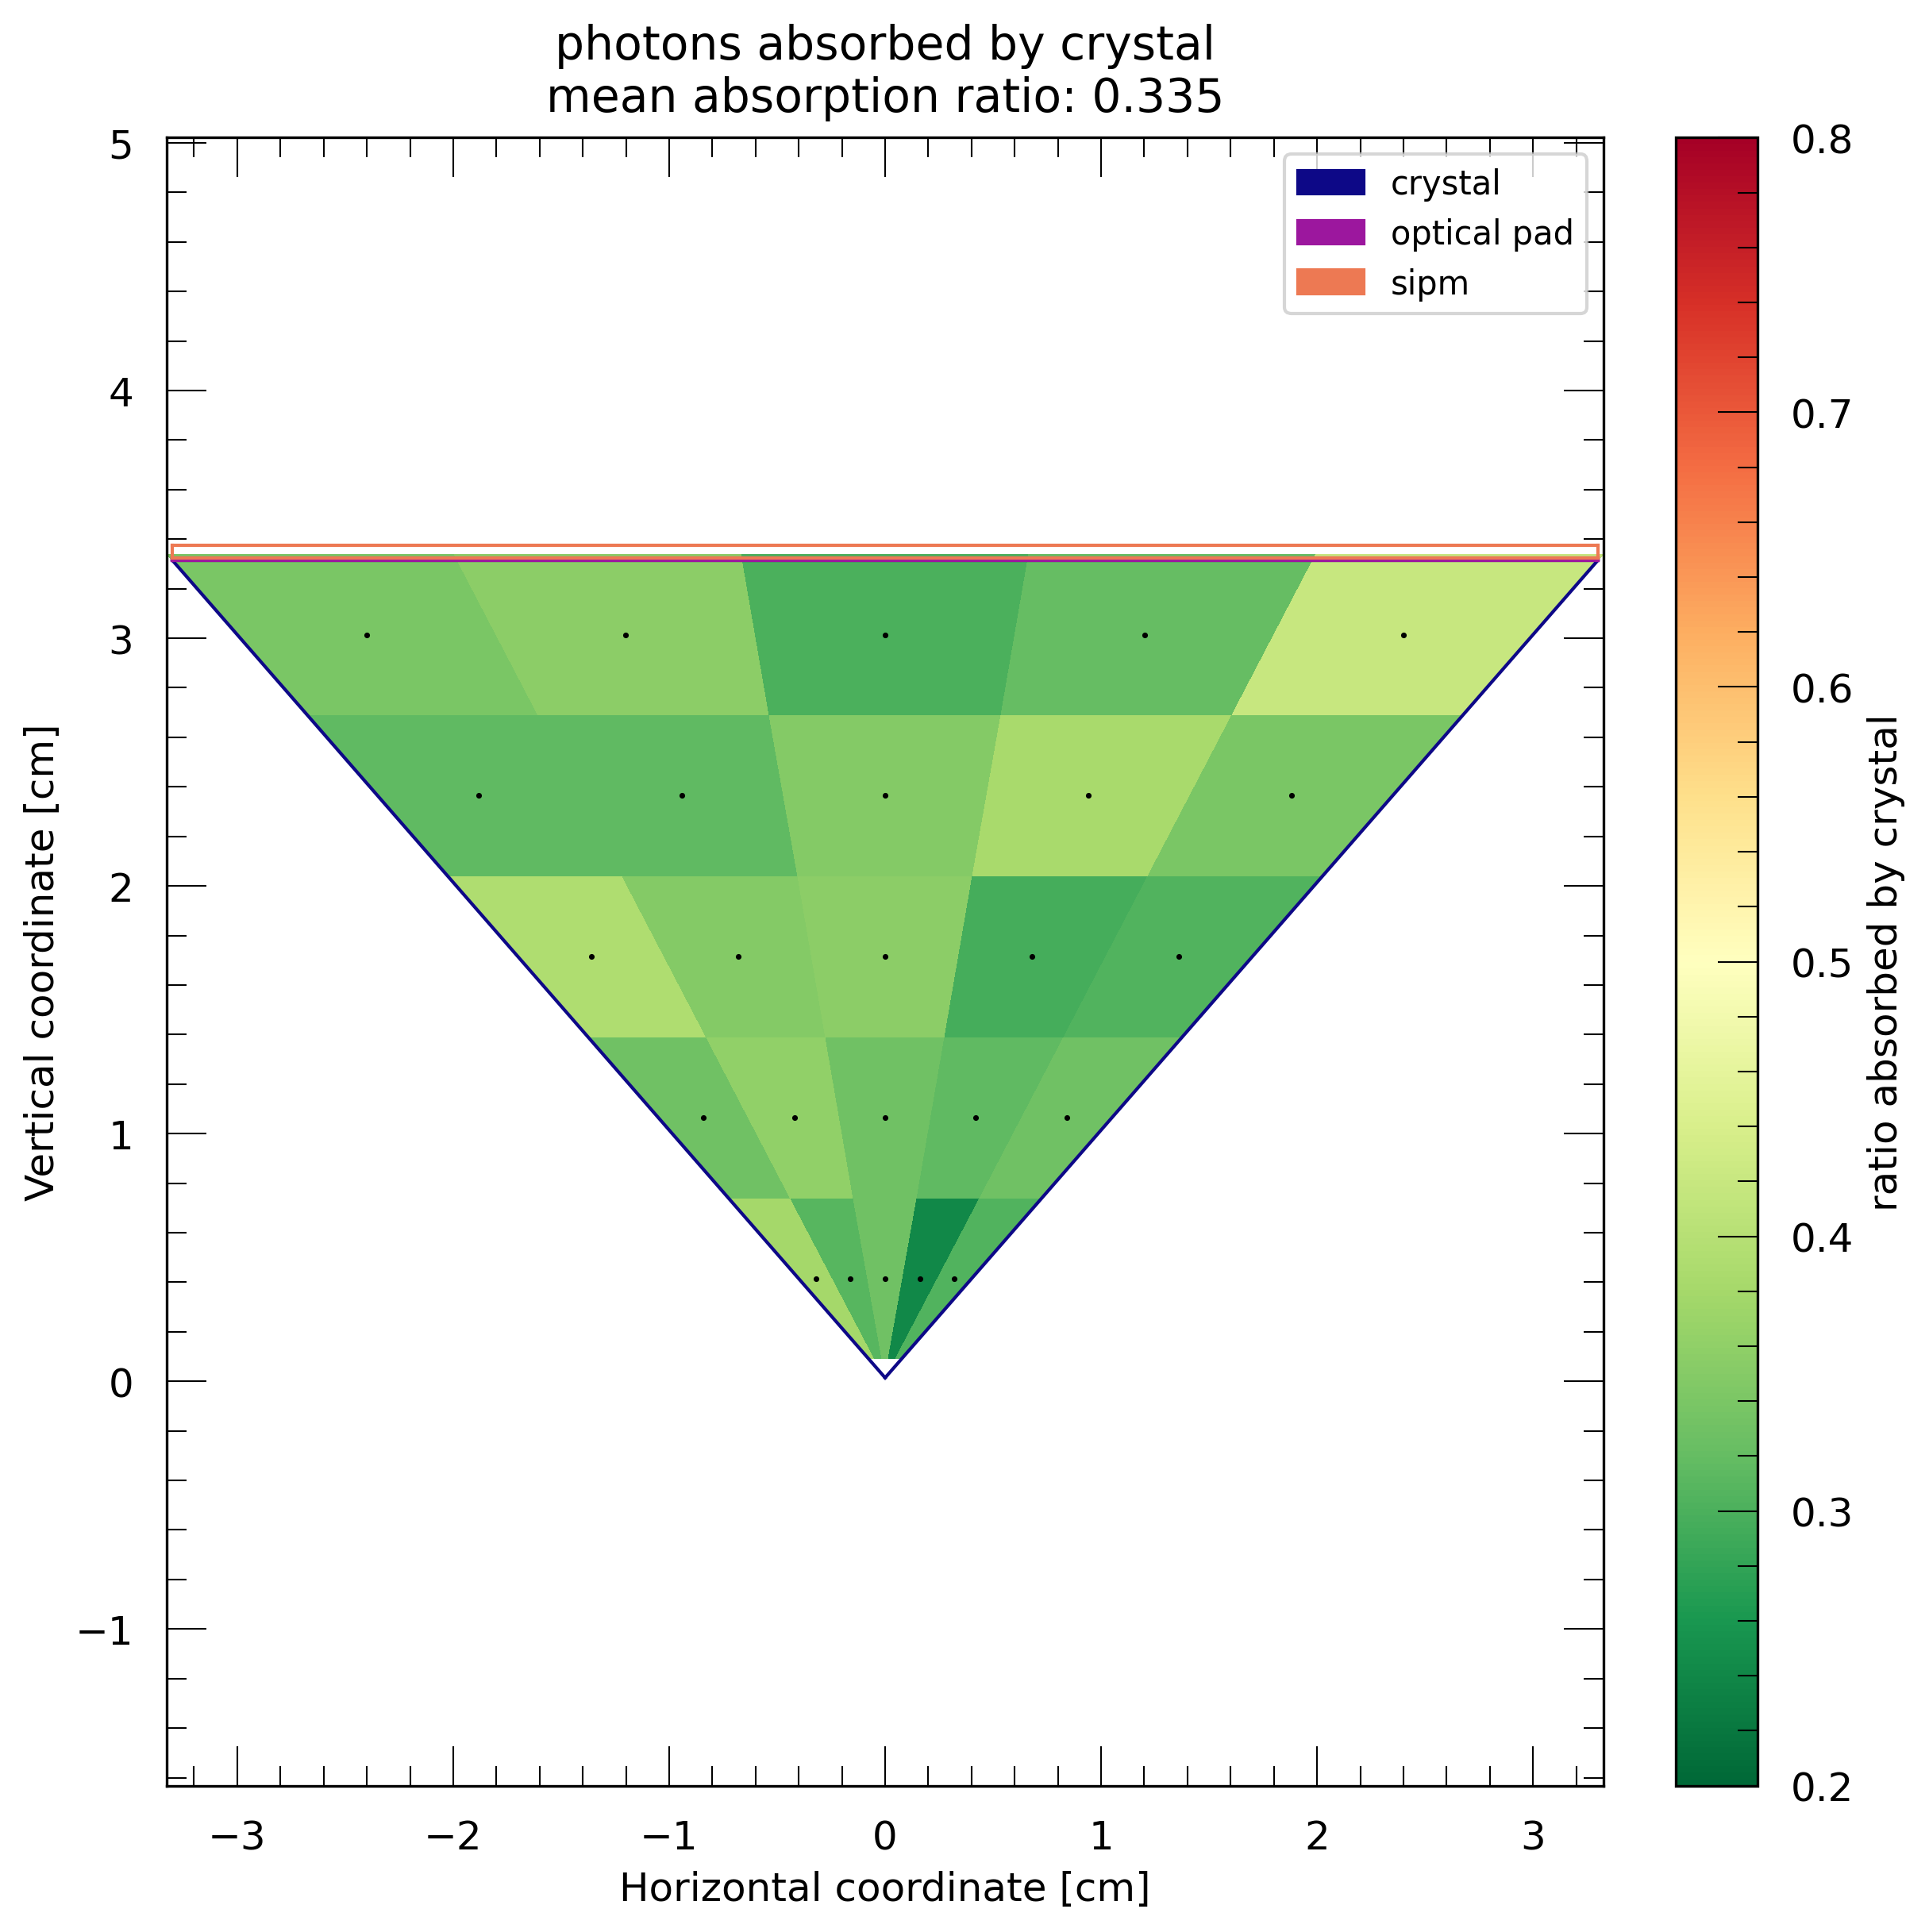

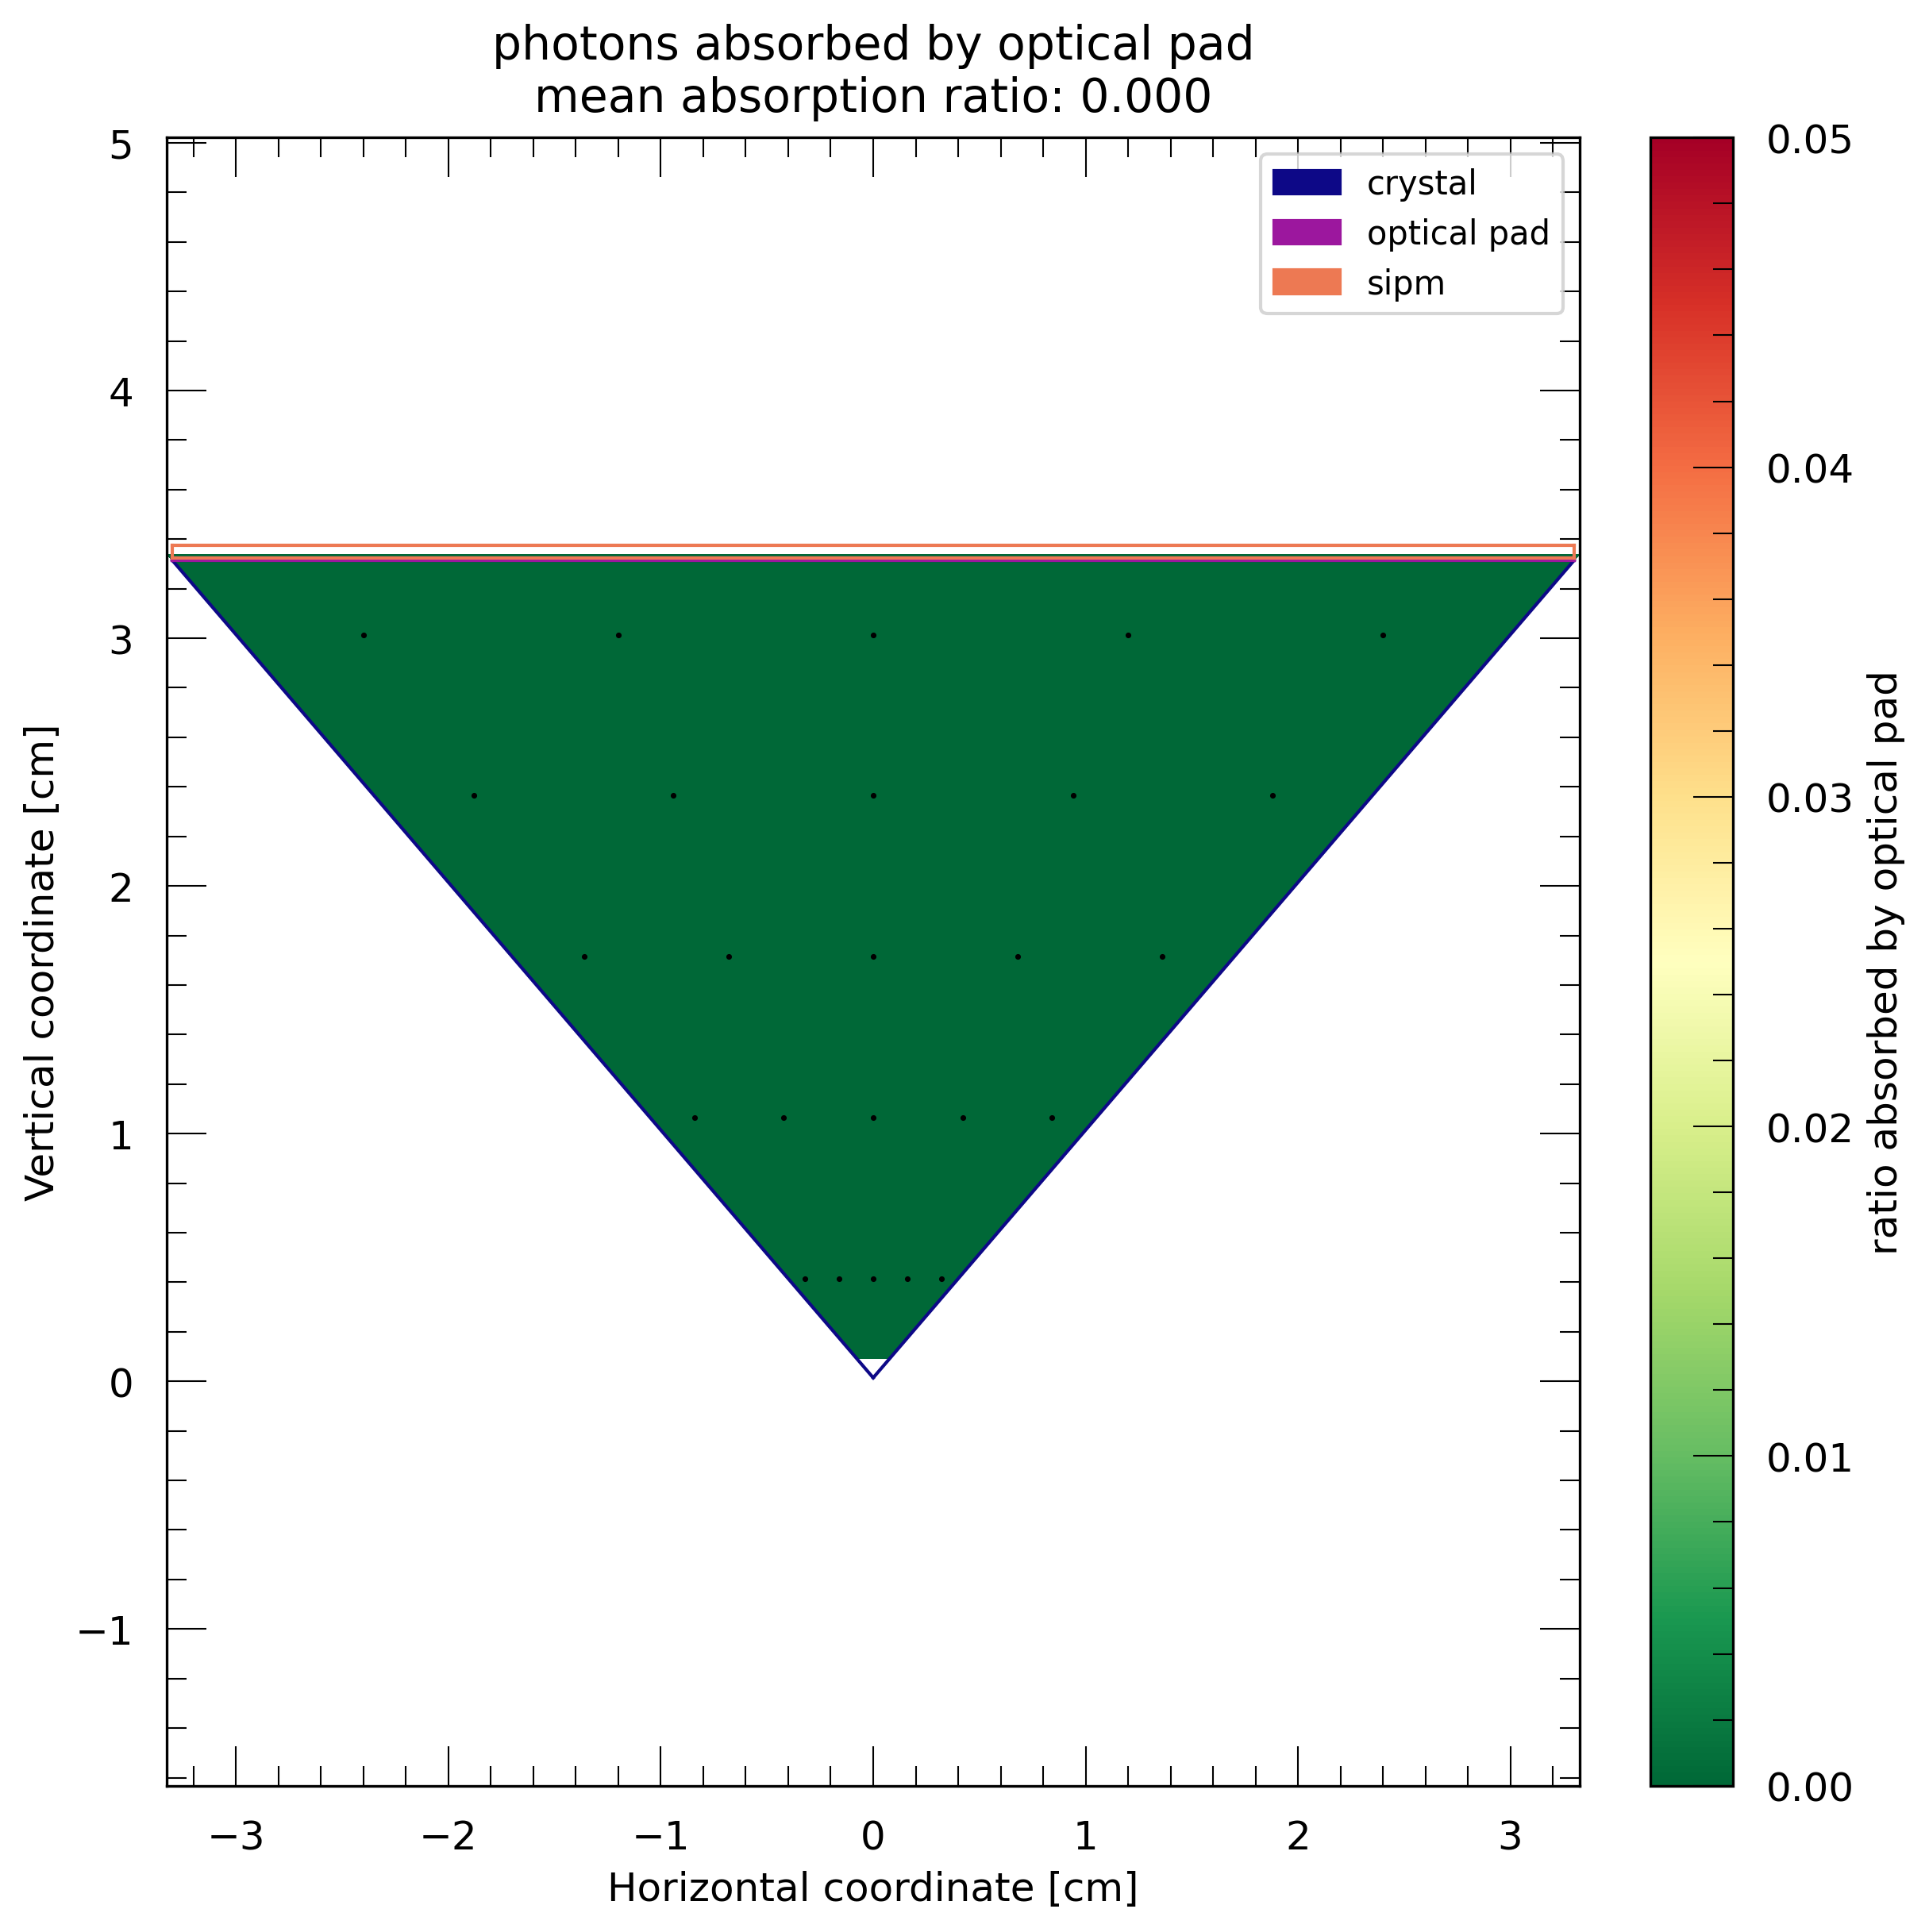

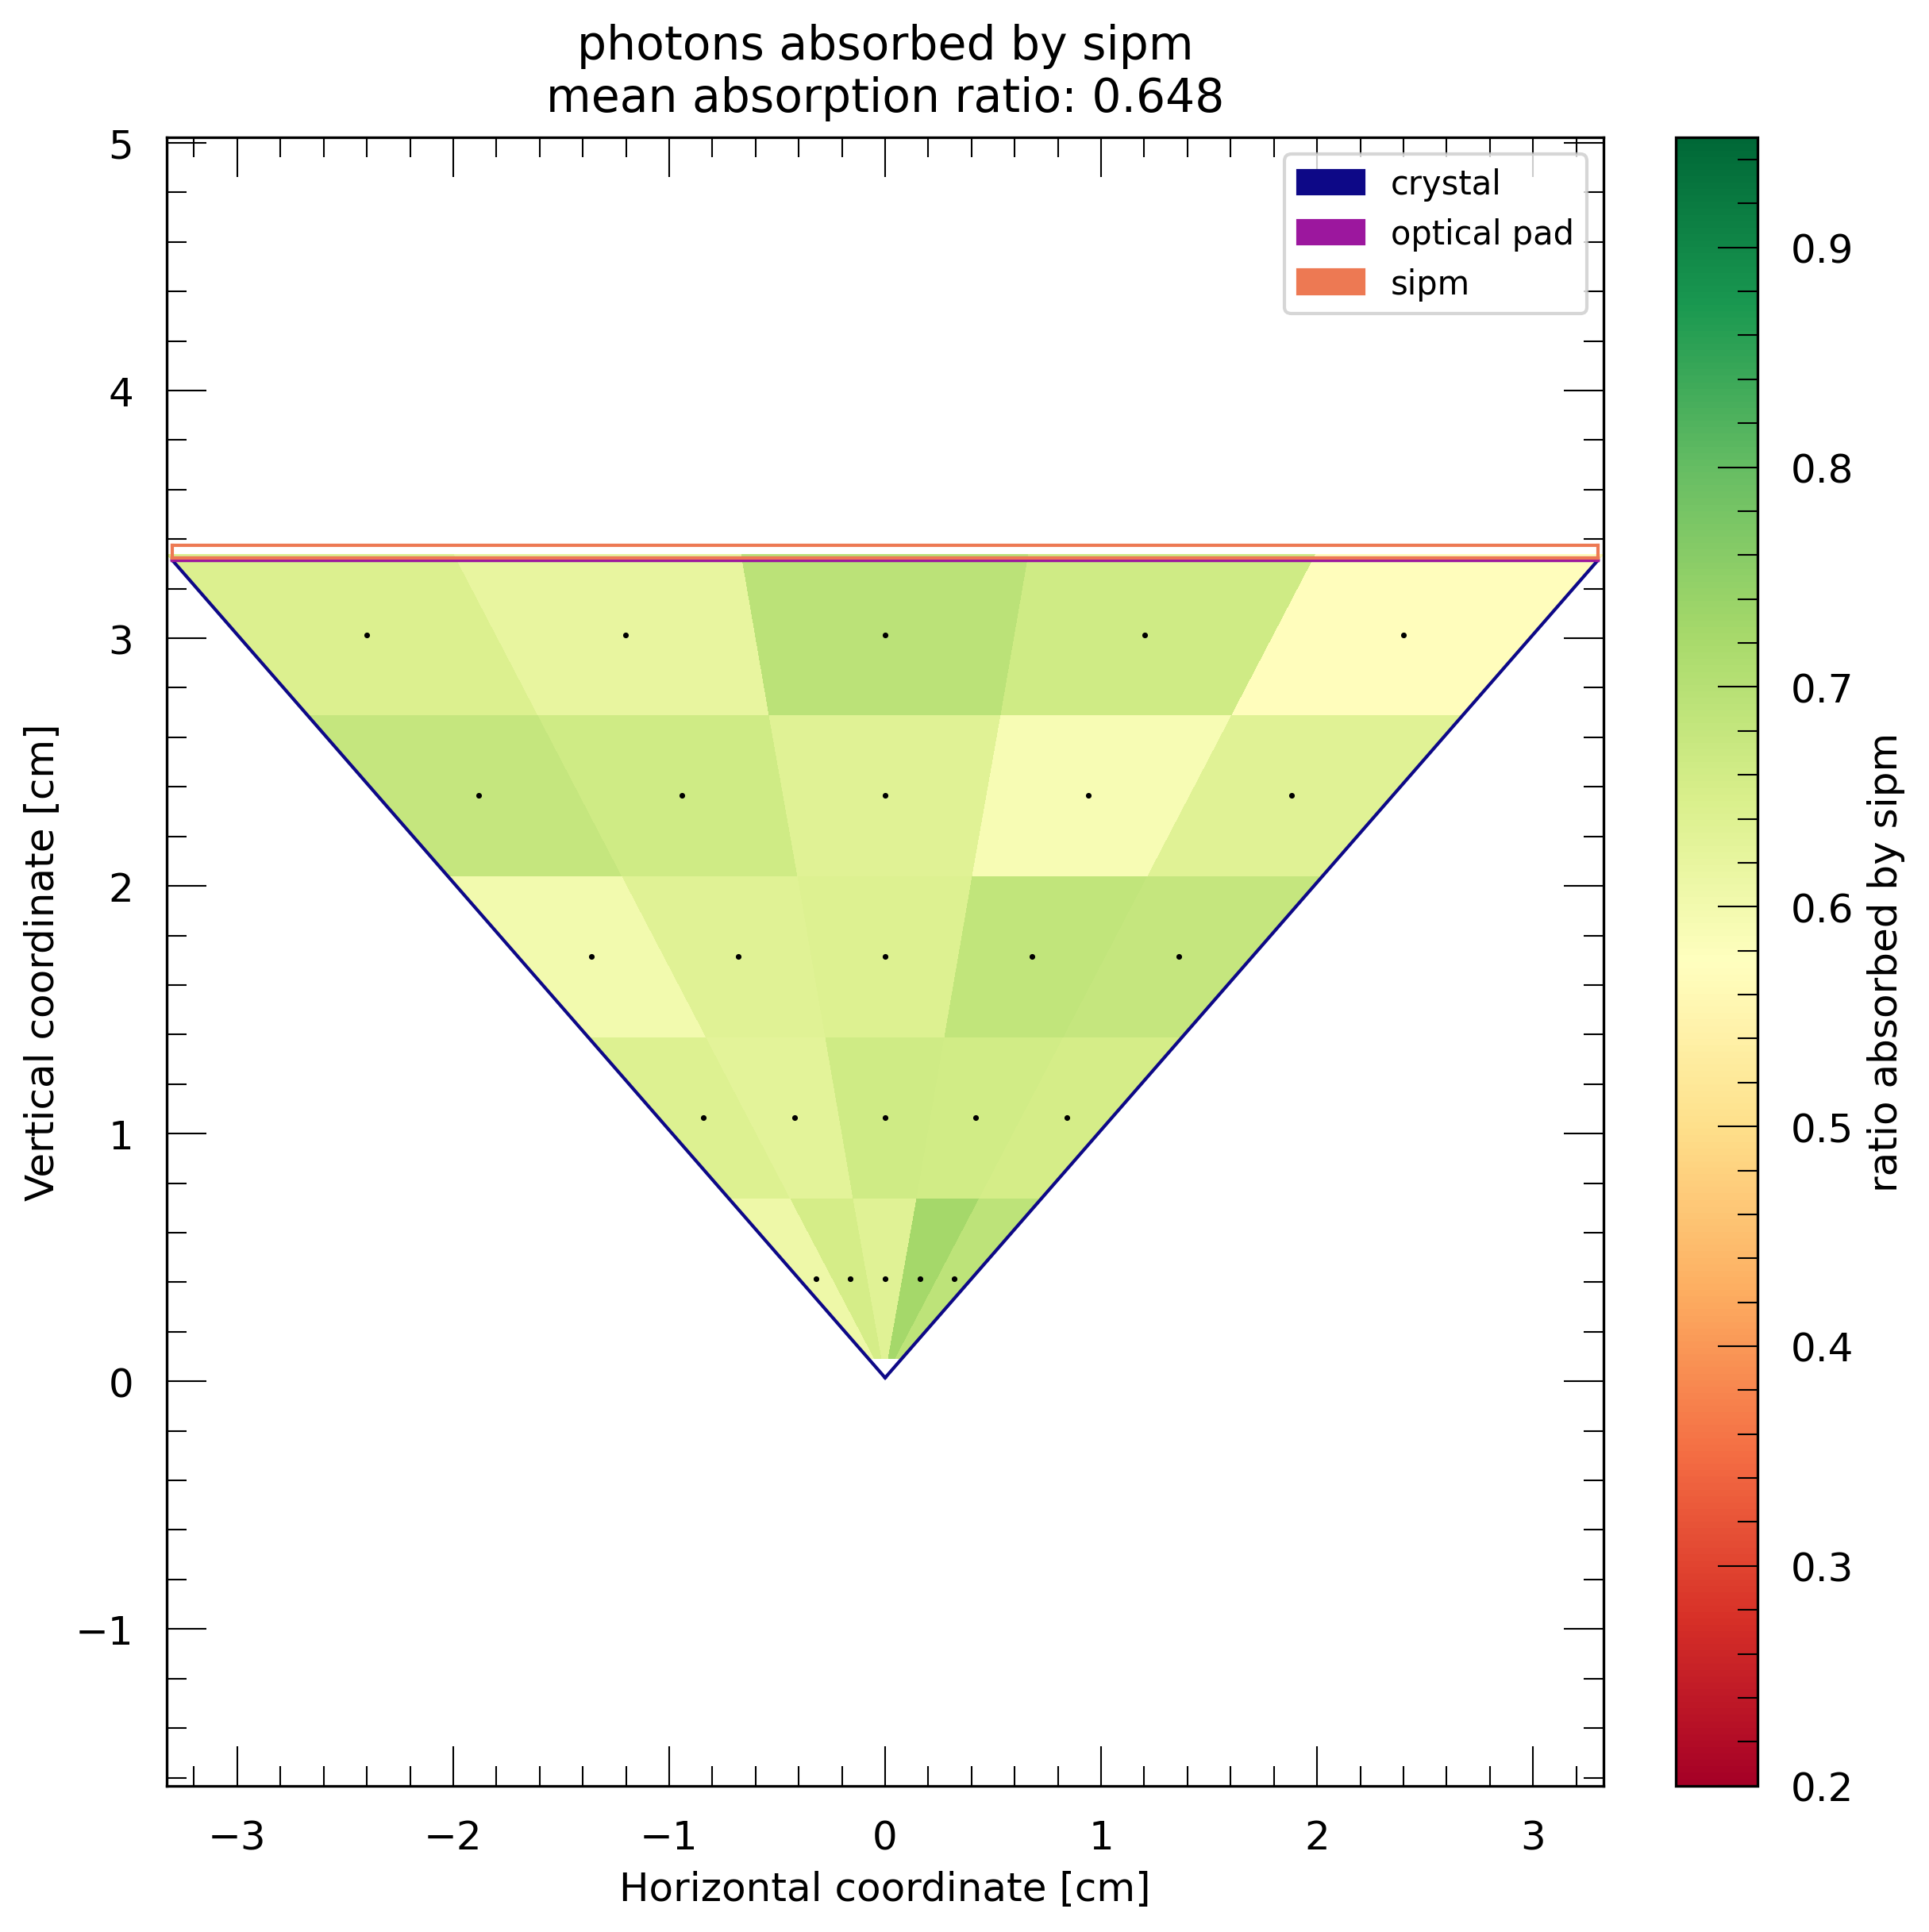

In [23]:
man.plot_all_ratios_absorbed(sipm_kwargs=dict(vmax=0.95))